# Clasificación via Clustering y ML

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
print('The numpy version is {}.'.format(np.__version__))

The numpy version is 1.16.2.


In [2]:
data = pd.read_csv("BMW_PIPELINE_train.csv", sep = ",", encoding = "ISO-8859-1")
data = data.fillna(0) #llenamos los NaN's con ceros
data.head()

,pol_compl,año_reg,mes_reg,anterior,nueva,diferencia,vehiculo,estimacion,pagos,gastos,ajustes,saldo,cp,renovo
0,I0038162,2017,8,22103,21603,-500,11284,4000.0,0.0,0.0,0.0,4000.0,7770,1
1,D3328411,2018,11,19069,18569,-500,11284,0.0,0.0,0.0,0.0,0.0,45070,1
2,I0038601,2017,8,33972,36690,2718,11855,5250.0,0.0,0.0,0.0,5250.0,36947,1
3,D3328395,2018,11,17353,16853,-500,10548,500.0,0.0,0.0,-500.0,0.0,76120,1
4,I0038169,2017,8,27013,26513,-500,9976,0.0,0.0,0.0,0.0,0.0,54750,1


In [3]:
# Separamos las X y las Y, pasamos a arreglos 
X = data.drop(['renovo','pol_compl'],axis=1) #,'pol_compl','mes'
y = data["renovo"]
print("Dimensiones de los features: {}".format(X.shape))
print("Dimensiones del target: {}".format(y.shape))

Dimensiones de los features: (1281, 12)
Dimensiones del target: (1281,)


**Con TSNE**

In [4]:
from sklearn.manifold import TSNE

In [5]:
tsne = TSNE()

In [6]:
X_projected = tsne.fit_transform(X)

X_projected.shape

(1281, 2)

Text(0.5, 1.0, 'Clasificación de renovaciones con TSNE')

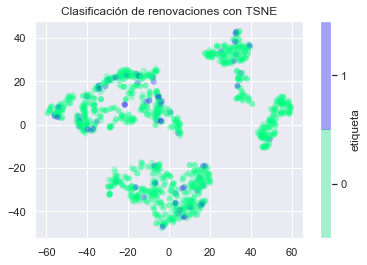

In [7]:
plt.close()

plt.scatter(X_projected[:,0], X_projected[:,1], c=y,
            edgecolor = 'none',
            alpha = 0.3,
            cmap = plt.cm.get_cmap('winter_r', 2))

plt.colorbar(label = 'etiqueta', ticks = range(2))

plt.clim(-0.5, 1.5)
plt.title('Clasificación de renovaciones con TSNE')

**Con PCA**

Text(0.5, 1.0, 'Clasificación de renovaciones con PCA')

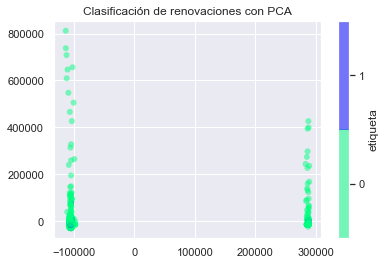

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(X)
#X_pca = pca.transform(X)



X_projected = pca.transform(X)

X_projected.shape

plt.close()

plt.scatter(X_projected[:,0], X_projected[:,1], c=y,
            edgecolor = 'none',
            alpha = 0.5,
            cmap = plt.cm.get_cmap('winter_r', 2))

plt.colorbar(label = 'etiqueta', ticks = range(2))

plt.clim(-0.5, 1.5)
plt.title('Clasificación de renovaciones con PCA')

**Con Isomap**

Text(0.5, 1.0, 'Clasificación de renovaciones con Isomap')

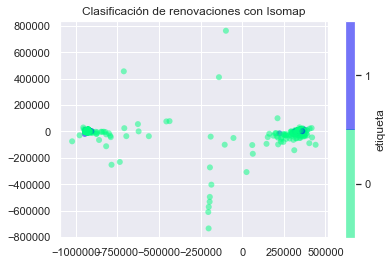

In [9]:
from sklearn.manifold import Isomap
iso = Isomap(n_neighbors = 20)
iso.fit(X)
#X_iso = iso.transform(X)


X_projected = iso.transform(X)

X_projected.shape

plt.close()

plt.scatter(X_projected[:,0], X_projected[:,1], c=y,
            edgecolor = 'none',
            alpha = 0.5,
            cmap = plt.cm.get_cmap('winter_r', 2))

plt.colorbar(label = 'etiqueta', ticks = range(2))

plt.clim(-0.5, 1.5)
plt.title('Clasificación de renovaciones con Isomap')

**Resumen clustering:**

Entre los 3 algoritmos, podemos concluir que visualmente TSNE clasifica mejor, debemos probar con datos nuevos y sus clasificaciones, implementar paralelamente a la aplicación real y monitorear resultados. Sin embargo parece complejo distinguir con estos algoritmos renovaciones reales.

**Con Random Forest**

Accuracy: 0.9345794392523364
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       320
           1       0.00      0.00      0.00         1

   micro avg       0.93      0.93      0.93       321
   macro avg       0.50      0.47      0.48       321
weighted avg       0.99      0.93      0.96       321



Text(89.18, 0.5, 'Valor real')

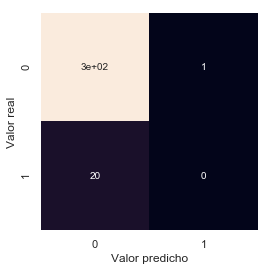

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=5)
model1.fit(X_train, y_train)
y_model1 = model1.predict(X_test)


## Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: {}".format(accuracy_score(y_test, y_model1)))

## Métricas clasicas de Clasificadores
from sklearn import metrics
print(metrics.classification_report(y_model1, y_test))

## Matriz de confusión
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_model1)

plt.close()

sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('Valor predicho')
plt.ylabel('Valor real')

probamos con 5,6 y 12 features...

**Con 5**

Accuracy: 0.940809968847352
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       320
           1       0.05      1.00      0.10         1

   micro avg       0.94      0.94      0.94       321
   macro avg       0.53      0.97      0.53       321
weighted avg       1.00      0.94      0.97       321



C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Text(89.18, 0.5, 'Valor real')

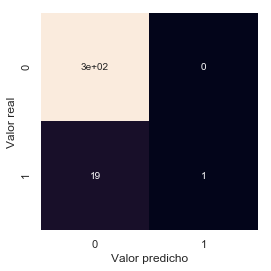

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=54)

from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(max_features=5)
model2.fit(X_train, y_train)
y_model2 = model2.predict(X_test)


## Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: {}".format(accuracy_score(y_test, y_model2)))

## Métricas clasicas de Clasificadores
from sklearn import metrics
print(metrics.classification_report(y_model2, y_test))

## Matriz de confusión
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_model2)

plt.close()

sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('Valor predicho')
plt.ylabel('Valor real')

**6 features**

Accuracy: 0.9376947040498442
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       319
           1       0.05      0.50      0.09         2

   micro avg       0.94      0.94      0.94       321
   macro avg       0.52      0.72      0.53       321
weighted avg       0.99      0.94      0.96       321



C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Text(89.18, 0.5, 'Valor real')

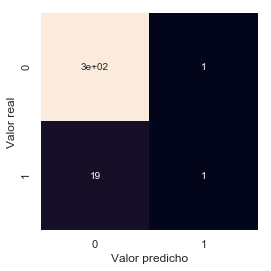

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=54)

from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(max_features=6)
model3.fit(X_train, y_train)
y_model3 = model3.predict(X_test)


## Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: {}".format(accuracy_score(y_test, y_model3)))

## Métricas clasicas de Clasificadores
from sklearn import metrics
print(metrics.classification_report(y_model3, y_test))

## Matriz de confusión
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_model3)

plt.close()

sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('Valor predicho')
plt.ylabel('Valor real')

**12 features**

Accuracy: 0.9376947040498442
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       319
           1       0.05      0.50      0.09         2

   micro avg       0.94      0.94      0.94       321
   macro avg       0.52      0.72      0.53       321
weighted avg       0.99      0.94      0.96       321



C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Text(89.18, 0.5, 'Valor real')

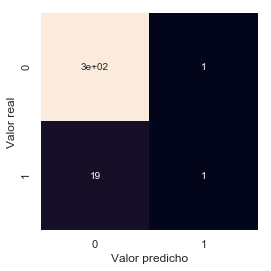

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=54)

from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(max_features=12)
model4.fit(X_train, y_train)
y_model4 = model4.predict(X_test)


## Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: {}".format(accuracy_score(y_test, y_model4)))

## Métricas clasicas de Clasificadores
from sklearn import metrics
print(metrics.classification_report(y_model4, y_test))

## Matriz de confusión
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_model4)

plt.close()

sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('Valor predicho')
plt.ylabel('Valor real')

**Resumen Random Forest:**

En este ejemplo en realidad los resultados parecen muy prometedores, los niveles de ACC son muy buenos y no distntes uno de otro segun parametros, se sugiere pasar algoritmo por GridSearch para encontrar los parametros idoneos!!!!

In [14]:
m1=[]
m2=[]
m3=[]
m4=[]
w=[]
for i in range(100):
    model = RandomForestClassifier(n_estimators=5)
    model.fit(X_train, y_train)
    y_model = model4.predict(X_test)
    a=accuracy_score(y_test, y_model)
    m1.append(a)
    
    
    model2 = RandomForestClassifier(max_features=5)
    model2.fit(X_train, y_train)
    y_model2 = model2.predict(X_test)
    b=accuracy_score(y_test, y_model2)
    m2.append(b)
    
    model3 = RandomForestClassifier(max_features=6)
    model3.fit(X_train, y_train)
    y_model3 = model3.predict(X_test)
    c=accuracy_score(y_test, y_model3)
    m3.append(c)
    
    model4 = RandomForestClassifier(max_features=12)
    model4.fit(X_train, y_train)
    y_model4 = model4.predict(X_test)
    d=accuracy_score(y_test, y_model4)
    m4.append(d)    
    
    k=np.where(np.array([a,b,c,d]==max(a,b,c,d)))[0][0] 
               
    w.append(k)           

C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "

C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "

C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "

C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "

C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "

C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "

C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "

C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "

C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrador\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "

In [44]:
pd.Series(w).value_counts()

1    39
0    36
2    16
3    11
dtype: int64

Text(0.5, 1.0, 'Comparación del accuracy de modelos en 100 iteraciones')

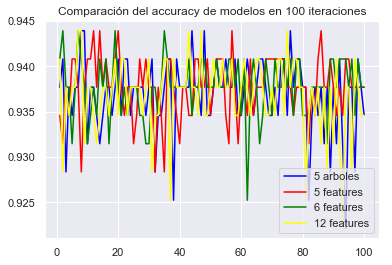

In [51]:
x=np.linspace(1,100,100)
plt.plot(x,m1,color='blue',label='5 arboles')
plt.plot(x,m2,color='red',label='5 features')
plt.plot(x,m3,color='green',label='6 features')
plt.plot(x,m4,color='yellow',label='12 features')
plt.legend(loc="lower right")
plt.title('Comparación del accuracy de modelos en 100 iteraciones')

Obteniendo la frecuencia de cual es modelo que tiene mejor accuracy en 100 teraciones vemos que sería el modelo "1" que corresponde a 5 features que tiene más de la tercera parte de veces el menor error de clasificación.

In [48]:
cuenta = pd.Series(w).value_counts()
cuenta = pd.DataFrame(data=cuenta)
cuenta.columns = ['veces ganador']
cuenta

,veces ganador
1,39
0,36
2,16
3,11


Entonces de las 100 iteraciones, el modelo 1 fue el ganador con 39 veces con el mayor accuracy seguido del modelo 0 con 36 veces con el mayor accuracy.

Cambiamos de clasificador a GaussianNB

Accuracy: 0.21806853582554517
              precision    recall  f1-score   support

           0       0.17      0.98      0.29        52
           1       0.95      0.07      0.13       269

   micro avg       0.22      0.22      0.22       321
   macro avg       0.56      0.53      0.21       321
weighted avg       0.82      0.22      0.16       321



Text(89.18, 0.5, 'Valor real')

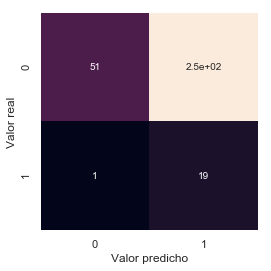

In [19]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(X_train,y_train) 
pred=NB.predict(X_test) 


## Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: {}".format(accuracy_score(y_test, pred)))

## Métricas clasicas de Clasificadores
from sklearn import metrics
print(metrics.classification_report(pred, y_test))

## Matriz de confusión
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, pred)

plt.close()

sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('Valor predicho')
plt.ylabel('Valor real')

La justificación de no poner parámetros se debe a que en primer lugar GaussianNB sólo toma 1 parámetro las prbabilidades apriori ajustadas con los datos, es decir, por default ajusta los priors de acuedo con la proporción de cada clase en la base, entonces dado que no es nuestra intención cambiar estos priors
(esto podría servir para sobrecargar) entonces no los movemos de todos modos si vemos abajo se muestran los priors de las 10 clases.

In [52]:
np.bincount(y_train)/len(y_train)

array([0.946875, 0.053125])

En este caso las clases NO estan balanceadas cada una tiene una apriori muy diferente.

**¿Cuál de todos los modelos arriba mencionados resulta mejor para este probelma especifico de reclasificación?**

Dentro de los modelos que mostramos el random forest con 5 features máximo es el que mejor funcion como lo vimos en el ejercicio anterior, el GaussianNB tiene un desempeño muy pobre segun las metricas.